### Student Activity: Market Analysis

This program reads daily stock data from a CSV and plots three different charts for three different analyses: pie (sector frequency distribution), bar (top 20 market cap companies), and scatter (price vs. earnings relationship).

In [2]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
%matplotlib inline

### Read CSV in as DataFrame

In [7]:
# Set the path
file_path = Path('../Resources/sp500_companies.csv')

# Read in the CSV as a DataFrame
sp500_companies_csv = pd.read_csv(file_path)
sp500_companies_csv.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,138721055226,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,10783419933,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,102121042306,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,181386347059,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,98765855553,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


### Calculate Sector Counts

In [10]:
# Count the frequency of each sector from the list of companies
sector_count = sp500_companies_csv['Sector'].value_counts()
sector_count

Consumer Discretionary        84
Information Technology        70
Financials                    68
Industrials                   67
Health Care                   61
Consumer Staples              34
Real Estate                   33
Energy                        32
Utilities                     28
Materials                     25
Telecommunication Services     3
Name: Sector, dtype: int64

### Plot Sector Counts

<AxesSubplot:ylabel='Sector'>

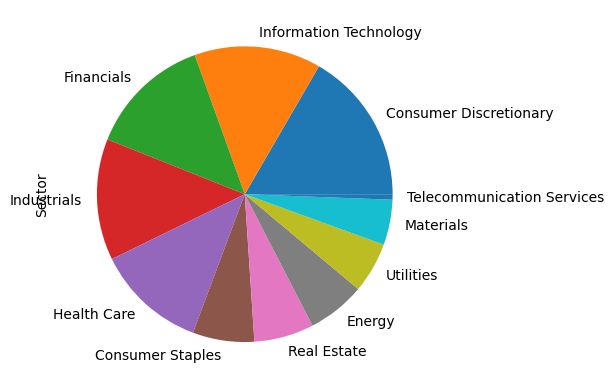

In [11]:
# Plot a pie chart from the distribution of company sectors
sector_count.plot(kind='pie')
#'line': Line plot
#'bar': Vertical bar plot
#'barh': Horizontal bar plot
#'hist': Histogram
#'box': Box plot
#'kde': Kernel density estimate plot
#'density': Density plot
#'area': Area plot
#'pie': Pie chart
#'scatter': Scatter plot
#'hexbin': Hexbin plot

### Filter By Top 20 Market Cap Companies

In [13]:
# Grab the `Symbol` and `Market Cap` columns
market_cap = sp500_companies_csv.loc[:, ['Symbol', 'Market Cap']]

# Set the 'Symbol' as the index
market_cap.set_index(market_cap['Symbol'], inplace=True)

# Drop the extra 'Symbol' column
market_cap.drop(columns=['Symbol'], inplace=True)

# Filter down to 20 companies with the largest market caps
top_20_market_cap = market_cap.nlargest(20, 'Market Cap')

# Display the DataFrame
top_20_market_cap

,Market Cap
Symbol,
AAPL,809508034020
GOOGL,733823966137
GOOG,728535558140
MSFT,689978437468
AMZN,685873374731
FB,523423036576
JPM,386613611000
JNJ,353062464971
XOM,326148660000


### Plot Top 20 Market Cap Companies

<AxesSubplot:title={'center':'Top 20 Market Cap Companies (in billions)'}, xlabel='Symbol'>

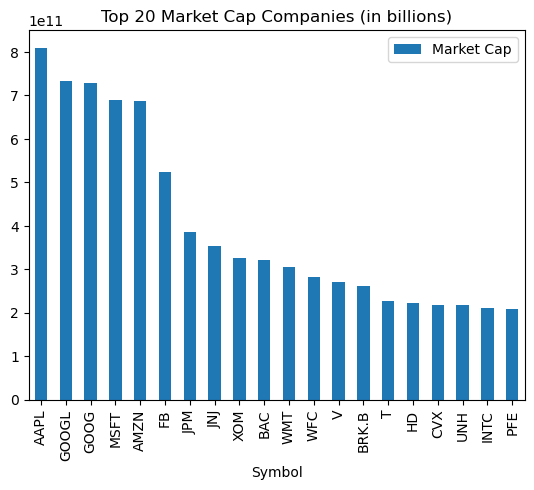

In [14]:
# Plot a bar chart of the top 20 market cap companies
top_20_market_cap.plot(kind='bar', title='Top 20 Market Cap Companies (in billions)')

### Plot Relationship Between Price and Earnings/Share

<AxesSubplot:xlabel='Earnings/Share', ylabel='Price'>

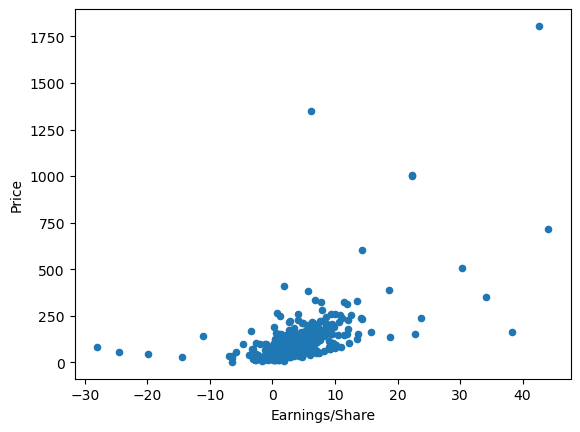

In [15]:
# Plot a scatter plot to display the relationship between price vs. earnings/share
sp500_companies_csv.plot(kind='scatter', x='Earnings/Share', y='Price')